In [2]:
pip install seaborn


  Using cached scipy-1.7.0-cp37-cp37m-win_amd64.whl (33.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import warnings
import pickle
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',-1)
sns.set_style("darkgrid")

In [4]:
#loading data
data = pd.read_csv('Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
#making a copy of original data
df = data.copy()

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
#chechking columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
#checking shape of data
df.shape

(1470, 35)

In [9]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
# Check the unique value in each column in a dataFrame and 
def unique_value(dataframe):
    '''Check the unique value in each column in a dataFrame
    parameter : DataFrame
    return :  A dataFrame contains two columns name of all column of dataframe 
              and unique vale which contain list of unique vale of each column.'''
    col_list = list(dataframe.columns)
    unique_value = [dataframe[col].unique() for col in col_list]
    nunique_value = [dataframe[col].nunique() for col in col_list]
    unique_dataF = pd.DataFrame({'Column Names':col_list,'Unique_value':unique_value,'No. of Unique Value':nunique_value})
    return unique_dataF

In [12]:
unique_value(df)

,Column Names,Unique_value,No. of Unique Value
0,Age,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53, 24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54, 58, 20, 25, 19, 57, 52, 47, 18, 60]",43
1,Attrition,"[Yes, No]",2
2,BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]",3
3,DailyRate,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358, 216, 1299, 809, 153, 670, 1346, 103, 1389, 334, 1123, 1219, 371, 673, 1218, 419, 391, 699, 1282, 1125, 691, 477, 705, 924, 1459, 125, 895, 813, 1273, 869, 890, 852, 1141, 464, 1240, 1357, 994, 721, 1360, 1065, 408, 1211, 1229, 626, 1434, 1488, 1097, 1443, 515, 853, 1142, 655, 1115, 427, 653, 989, 1435, 1223, 836, 1195, 1339, 664, 318, 1225, 1328, 1082, 548, 132, 746, 776, 193, 397, 945, 1214, 111, 573, 1153, 1400, 541, 432, 288, 669, 530, 632, 1334, 638, 1093, 1217, 1353, 120, 682, 489, 807, ...]",886
4,Department,"[Sales, Research & Development, Human Resources]",3
5,DistanceFromHome,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5, 11, 9, 7, 6, 10, 4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13]",29
6,Education,"[2, 1, 4, 3, 5]",5
7,EducationField,"[Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources]",6
8,EmployeeCount,[1],1
9,EmployeeNumber,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 68, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 88, 90, 91, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 110, 112, 113, 116, 117, 118, 119, 120, 121, 124, 125, 126, 128, 129, 131, 132, ...]",1470


In [13]:
#droping EmployeeNumber,EmployeeCount, Over18 and StandardHours
df.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis = 1,inplace = True)
df.shape

(1470, 31)

In [14]:
#cheking datatype of each column
df.dtypes

Age                         int64 
Attrition                   object
BusinessTravel              object
DailyRate                   int64 
Department                  object
DistanceFromHome            int64 
Education                   int64 
EducationField              object
EnvironmentSatisfaction     int64 
Gender                      object
HourlyRate                  int64 
JobInvolvement              int64 
JobLevel                    int64 
JobRole                     object
JobSatisfaction             int64 
MaritalStatus               object
MonthlyIncome               int64 
MonthlyRate                 int64 
NumCompaniesWorked          int64 
OverTime                    object
PercentSalaryHike           int64 
PerformanceRating           int64 
RelationshipSatisfaction    int64 
StockOptionLevel            int64 
TotalWorkingYears           int64 
TrainingTimesLastYear       int64 
WorkLifeBalance             int64 
YearsAtCompany              int64 
YearsInCurrentRole  

In [15]:
#Statistical information
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
#checking duplicate Row
df.loc[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## Exploratry Data Analysis(EDA)

### 1. Target Variable analysis
Around 16% employee attried from the company and data is highly imblanced

In [18]:
df.Attrition.value_counts(normalize = True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

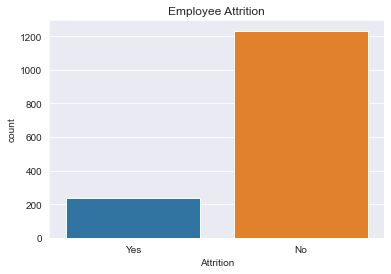

In [19]:
sns.countplot(x = 'Attrition', data = df)
plt.title('Employee Attrition')
plt.show()

## 2. Independent Variable

### (A) Categorical Variable

In [20]:
cat_var = df.select_dtypes(include ='object')
cat_var.shape

(1470, 8)

In [21]:
unique_value(cat_var)

,Column Names,Unique_value,No. of Unique Value
0,Attrition,"[Yes, No]",2
1,BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]",3
2,Department,"[Sales, Research & Development, Human Resources]",3
3,EducationField,"[Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources]",6
4,Gender,"[Female, Male]",2
5,JobRole,"[Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources]",9
6,MaritalStatus,"[Single, Married, Divorced]",3
7,OverTime,"[Yes, No]",2


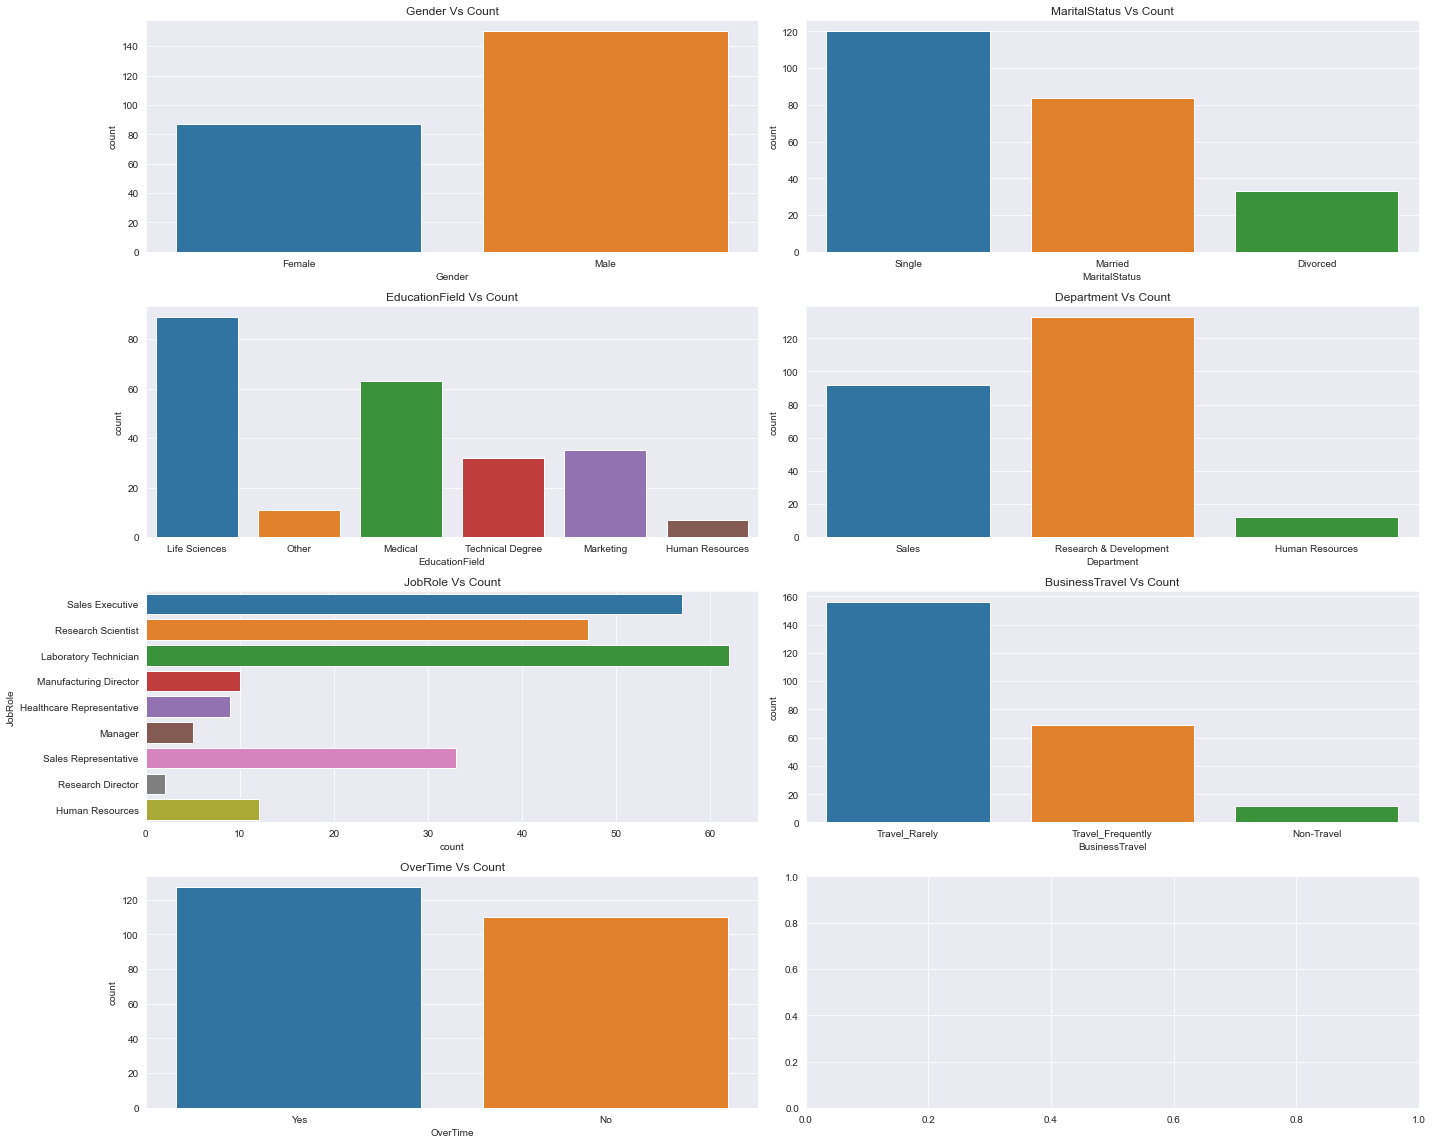

In [22]:
fig, ax = plt.subplots(4,2,figsize = (20,16))
sns.countplot(x= df[df['Attrition']=='Yes']['Gender'],ax = ax[0][0])
ax[0][0].set_title('Gender Vs Count')
sns.countplot(x= df[df['Attrition']=='Yes']['MaritalStatus'],ax = ax[0][1])
ax[0][1].set_title('MaritalStatus Vs Count')
sns.countplot(x = df[df['Attrition']=='Yes']['EducationField'],ax = ax[1][0])
ax[1][0].set_title('EducationField Vs Count')
sns.countplot(x= df[df['Attrition']=='Yes']['Department'],ax = ax[1][1])
ax[1][1].set_title('Department Vs Count')
sns.countplot(y= df[df['Attrition']=='Yes']['JobRole'].sort_values(),order = df['JobRole'].value_counts().index,ax = ax[2][0])
ax[2][0].set_title('JobRole Vs Count')
sns.countplot(x= df[df['Attrition']=='Yes']['BusinessTravel'],ax = ax[2][1])
ax[2][1].set_title('BusinessTravel Vs Count')

#ax[2][1].set_xtick(rot =90)
sns.countplot(x= df[df['Attrition']=='Yes']['OverTime'],ax = ax[3][0])
ax[3][0].set_title('OverTime Vs Count')
plt.tight_layout()
fig.show()

In [23]:
#Give the percentage of employee leave in a all category of a column
def percentage_value(dataFrame,column_name):
    '''return a dataframe with sum of percentage of a category in a column
    input:
    dataFrame :  A dataFrame
    column_name : Column Name for which percentage of each category to be calculate
    return : A data frame with percentage of each category'''
    
    d_column = pd.DataFrame(columns=[column_name, "% of Leavers"])
    i=0
    for field in list(dataFrame[column_name].unique()):
        ratio = dataFrame[(dataFrame[column_name]==field)&(dataFrame['Attrition']=="Yes")].shape[0] / dataFrame[dataFrame[column_name]==field].shape[0]
        d_column.loc[i] = (field, ratio*100)
        i += 1   
    DF = d_column.groupby(by=column_name).sum()
    return DF

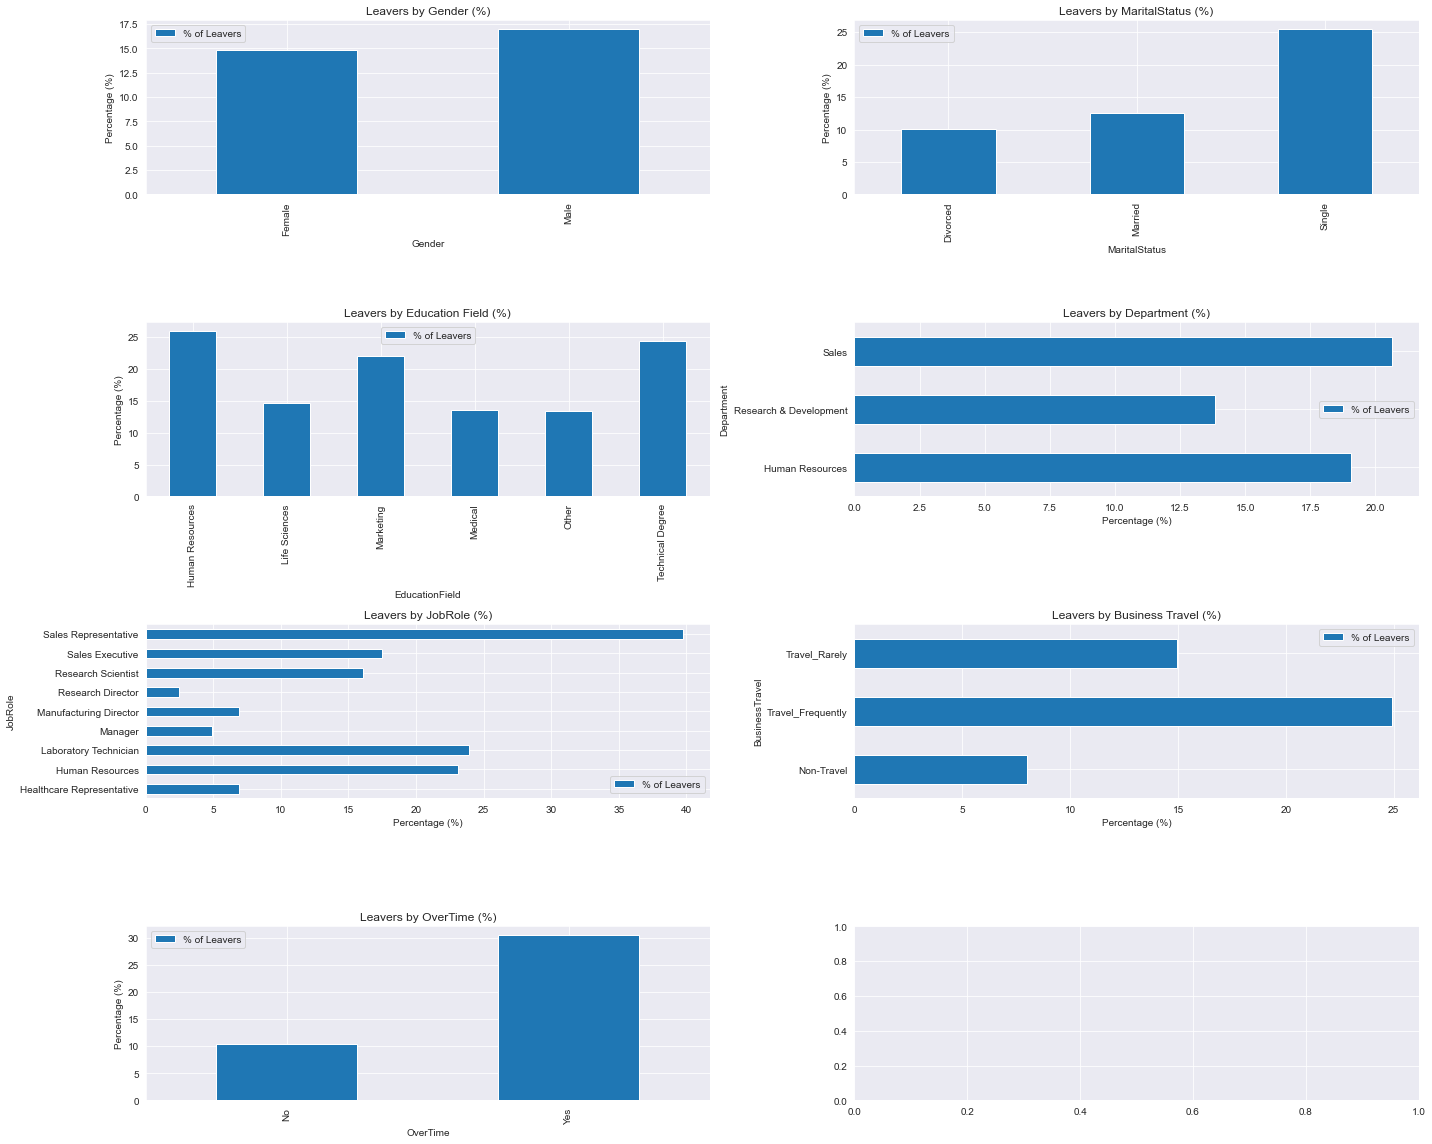

In [24]:
fig, ax = plt.subplots(4,2,figsize = (20,16))
percentage_value(df,'Gender').plot(kind='bar',title='Leavers by Gender (%)',ax =ax[0,0])
ax[0][0].set_ylabel('Percentage (%)')
percentage_value(df,'MaritalStatus').plot(kind='bar',title='Leavers by MaritalStatus (%)',ax =ax[0,1])
ax[0][1].set_ylabel('Percentage (%)')
percentage_value(df,'EducationField').plot(kind='bar',title='Leavers by Education Field (%)', ax = ax[1,0])
ax[1][0].set_ylabel('Percentage (%)')
percentage_value(df,'Department').plot(kind='barh',title='Leavers by Department (%)', ax = ax[1,1])
ax[1][1].set_xlabel('Percentage (%)')
percentage_value(df,'JobRole').plot(kind='barh',title='Leavers by JobRole (%)',ax =ax[2,0])
ax[2][0].set_xlabel('Percentage (%)')
percentage_value(df,'BusinessTravel').plot(kind='barh',title='Leavers by Business Travel (%)',ax =ax[2][1])
ax[2][1].set_xlabel('Percentage (%)')
percentage_value(df,'OverTime').plot(kind='bar',title='Leavers by OverTime (%)',ax =ax[3,0])
ax[3][0].set_ylabel('Percentage (%)')
plt.tight_layout()
plt.show()

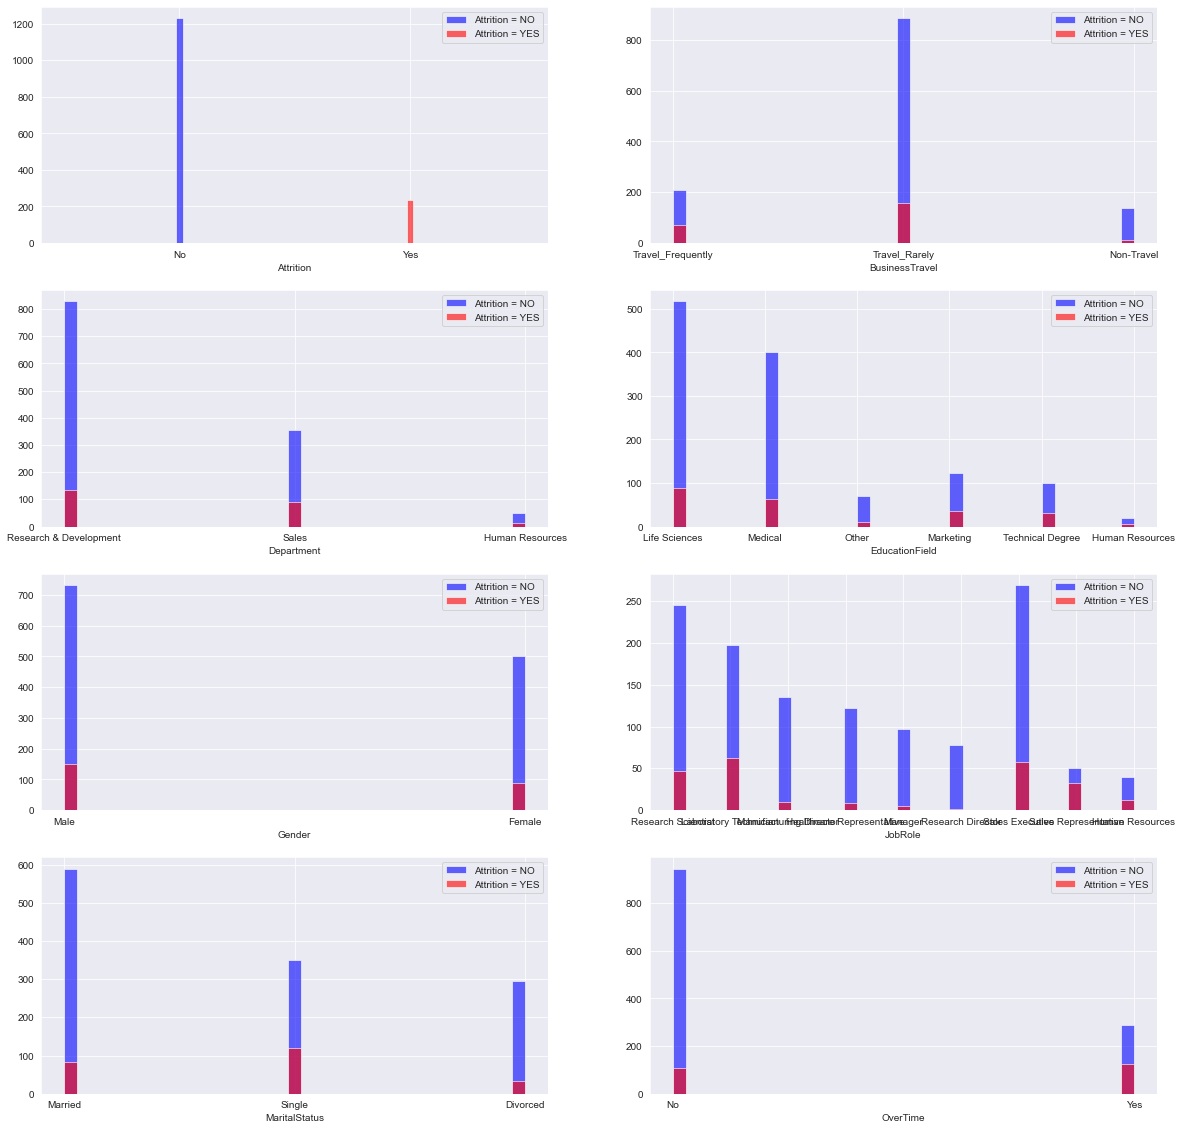

In [25]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(cat_var.columns, 1):
    plt.subplot(4, 2, i)
    df[df["Attrition"] == 'No'][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 'Yes'][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [26]:
num_var = df.select_dtypes(include ='int64')
num_var.shape

(1470, 23)

In [27]:
num_var.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [28]:
unique_value(num_var)

,Column Names,Unique_value,No. of Unique Value
0,Age,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53, 24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54, 58, 20, 25, 19, 57, 52, 47, 18, 60]",43
1,DailyRate,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358, 216, 1299, 809, 153, 670, 1346, 103, 1389, 334, 1123, 1219, 371, 673, 1218, 419, 391, 699, 1282, 1125, 691, 477, 705, 924, 1459, 125, 895, 813, 1273, 869, 890, 852, 1141, 464, 1240, 1357, 994, 721, 1360, 1065, 408, 1211, 1229, 626, 1434, 1488, 1097, 1443, 515, 853, 1142, 655, 1115, 427, 653, 989, 1435, 1223, 836, 1195, 1339, 664, 318, 1225, 1328, 1082, 548, 132, 746, 776, 193, 397, 945, 1214, 111, 573, 1153, 1400, 541, 432, 288, 669, 530, 632, 1334, 638, 1093, 1217, 1353, 120, 682, 489, 807, ...]",886
2,DistanceFromHome,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5, 11, 9, 7, 6, 10, 4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13]",29
3,Education,"[2, 1, 4, 3, 5]",5
4,EnvironmentSatisfaction,"[2, 3, 4, 1]",4
5,HourlyRate,"[94, 61, 92, 56, 40, 79, 81, 67, 44, 84, 49, 31, 93, 50, 51, 80, 96, 78, 45, 82, 53, 83, 58, 72, 48, 42, 41, 86, 97, 75, 33, 37, 73, 98, 36, 47, 71, 30, 43, 99, 59, 95, 57, 76, 87, 66, 55, 32, 52, 70, 62, 64, 63, 60, 100, 46, 39, 77, 35, 91, 54, 34, 90, 65, 88, 85, 89, 68, 69, 74, 38]",71
6,JobInvolvement,"[3, 2, 4, 1]",4
7,JobLevel,"[2, 1, 3, 4, 5]",5
8,JobSatisfaction,"[4, 2, 3, 1]",4
9,MonthlyIncome,"[5993, 5130, 2090, 2909, 3468, 3068, 2670, 2693, 9526, 5237, 2426, 4193, 2911, 2661, 2028, 9980, 3298, 2935, 15427, 3944, 4011, 3407, 11994, 1232, 2960, 19094, 3919, 6825, 10248, 18947, 2496, 6465, 2206, 2086, 2293, 2645, 2683, 2014, 3419, 5376, 1951, 2341, 8726, 19545, 4568, 3022, 5772, 2269, 5381, 3441, 5454, 9884, 4157, 13458, 9069, 4014, 5915, 6162, 2406, 18740, 7637, 10096, 14756, 6499, 9724, 2194, 3388, 5473, 2703, 2501, 6220, 3038, 4424, 4312, 13245, 13664, 5021, 5126, 2859, 10239, 5329, 4325, 7260, 2322, 2075, 4152, 9619, 13503, 5441, 5209, 10673, 5010, 13549, 4999, 4221, 13872, 2042, 2073, 2956, 2926, ...]",1349


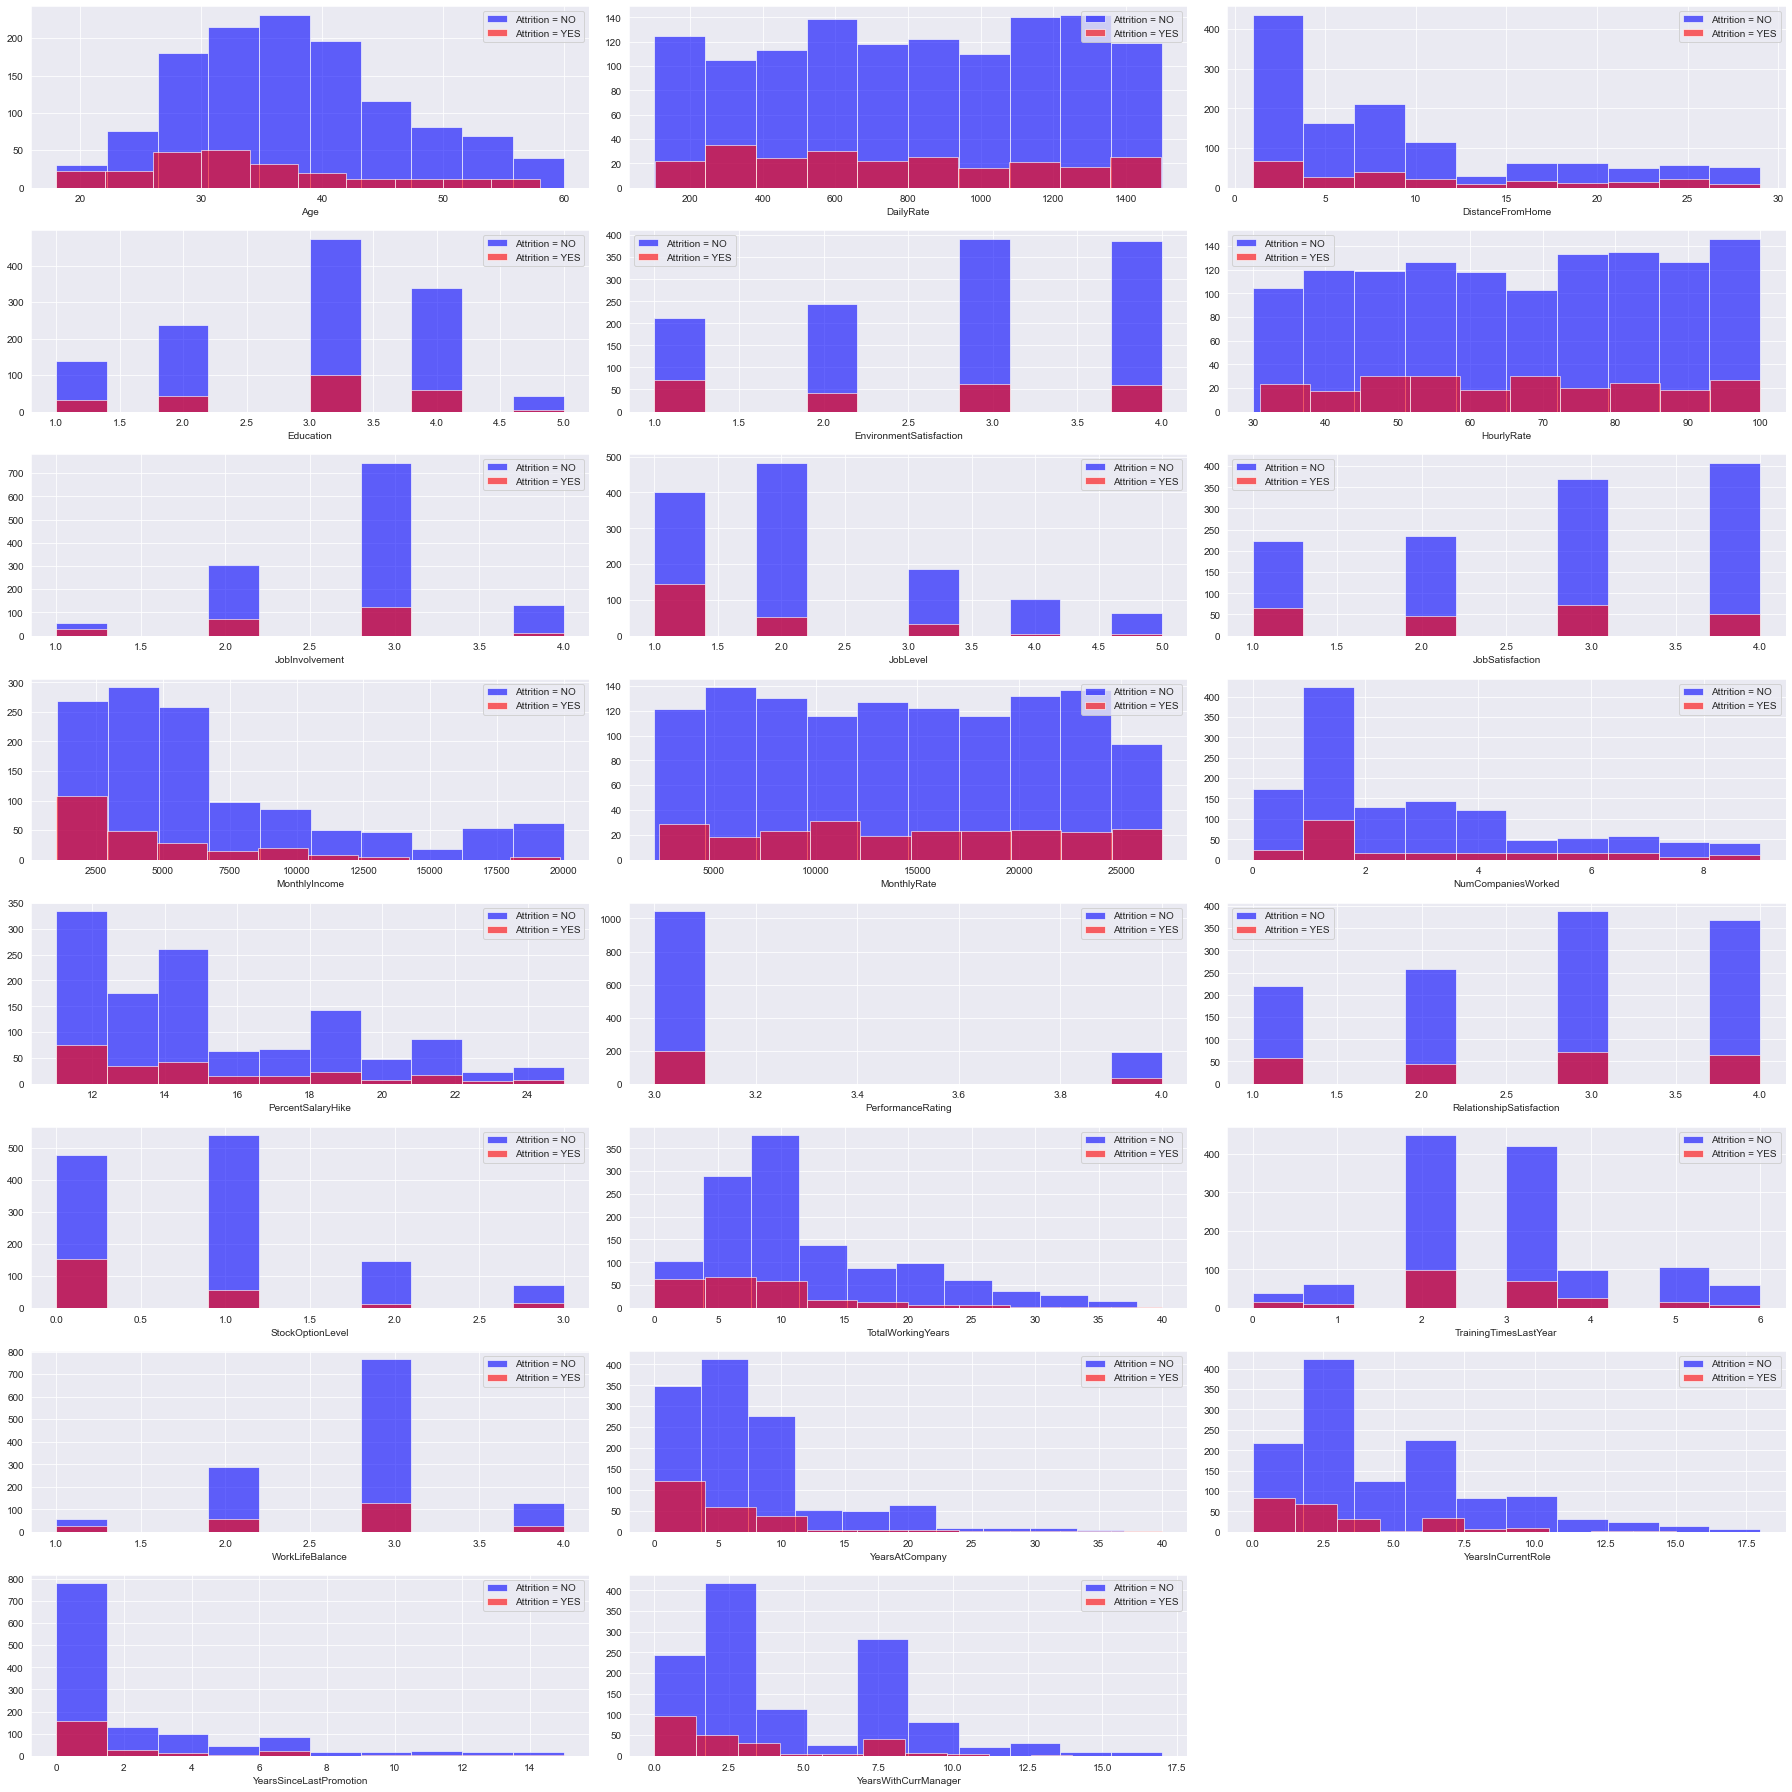

In [29]:
plt.figure(figsize=(25, 25))

for i, column in enumerate(num_var.columns, 1):
    plt.subplot(8, 3, i)
    df[df["Attrition"] == 'No'][column].hist(color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 'Yes'][column].hist(color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.xlabel(column)

 It seems that dailyrate, Hourlyrate, Monthlyrate, EnvironmentSatisfaction, JobSatisfaction, and RelationshipSatisfaction features don't have big impact on the detrmination of Attrition of employees.

In [31]:
df.drop(['DailyRate', 
         'HourlyRate', 
         'MonthlyRate', 
         'EnvironmentSatisfaction', 
         'JobSatisfaction',
         'RelationshipSatisfaction'],axis=1,inplace=True)

## EDA Remarks
1. The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.
2. Gender : The male employee are likely to quit there job but the perecentage of both seems to be equaly likely.
3. Marital Status: Single people are more likely to leave than others.
4. BusinessTravel : The workers who travel alot are more likely to quit then other employees.
5. Department : The worker in Research & Development are more likely to stay then the workers on other departement.
6. EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.
7. JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.
8. OverTime : The workers who work more hours are likely to quit then others.

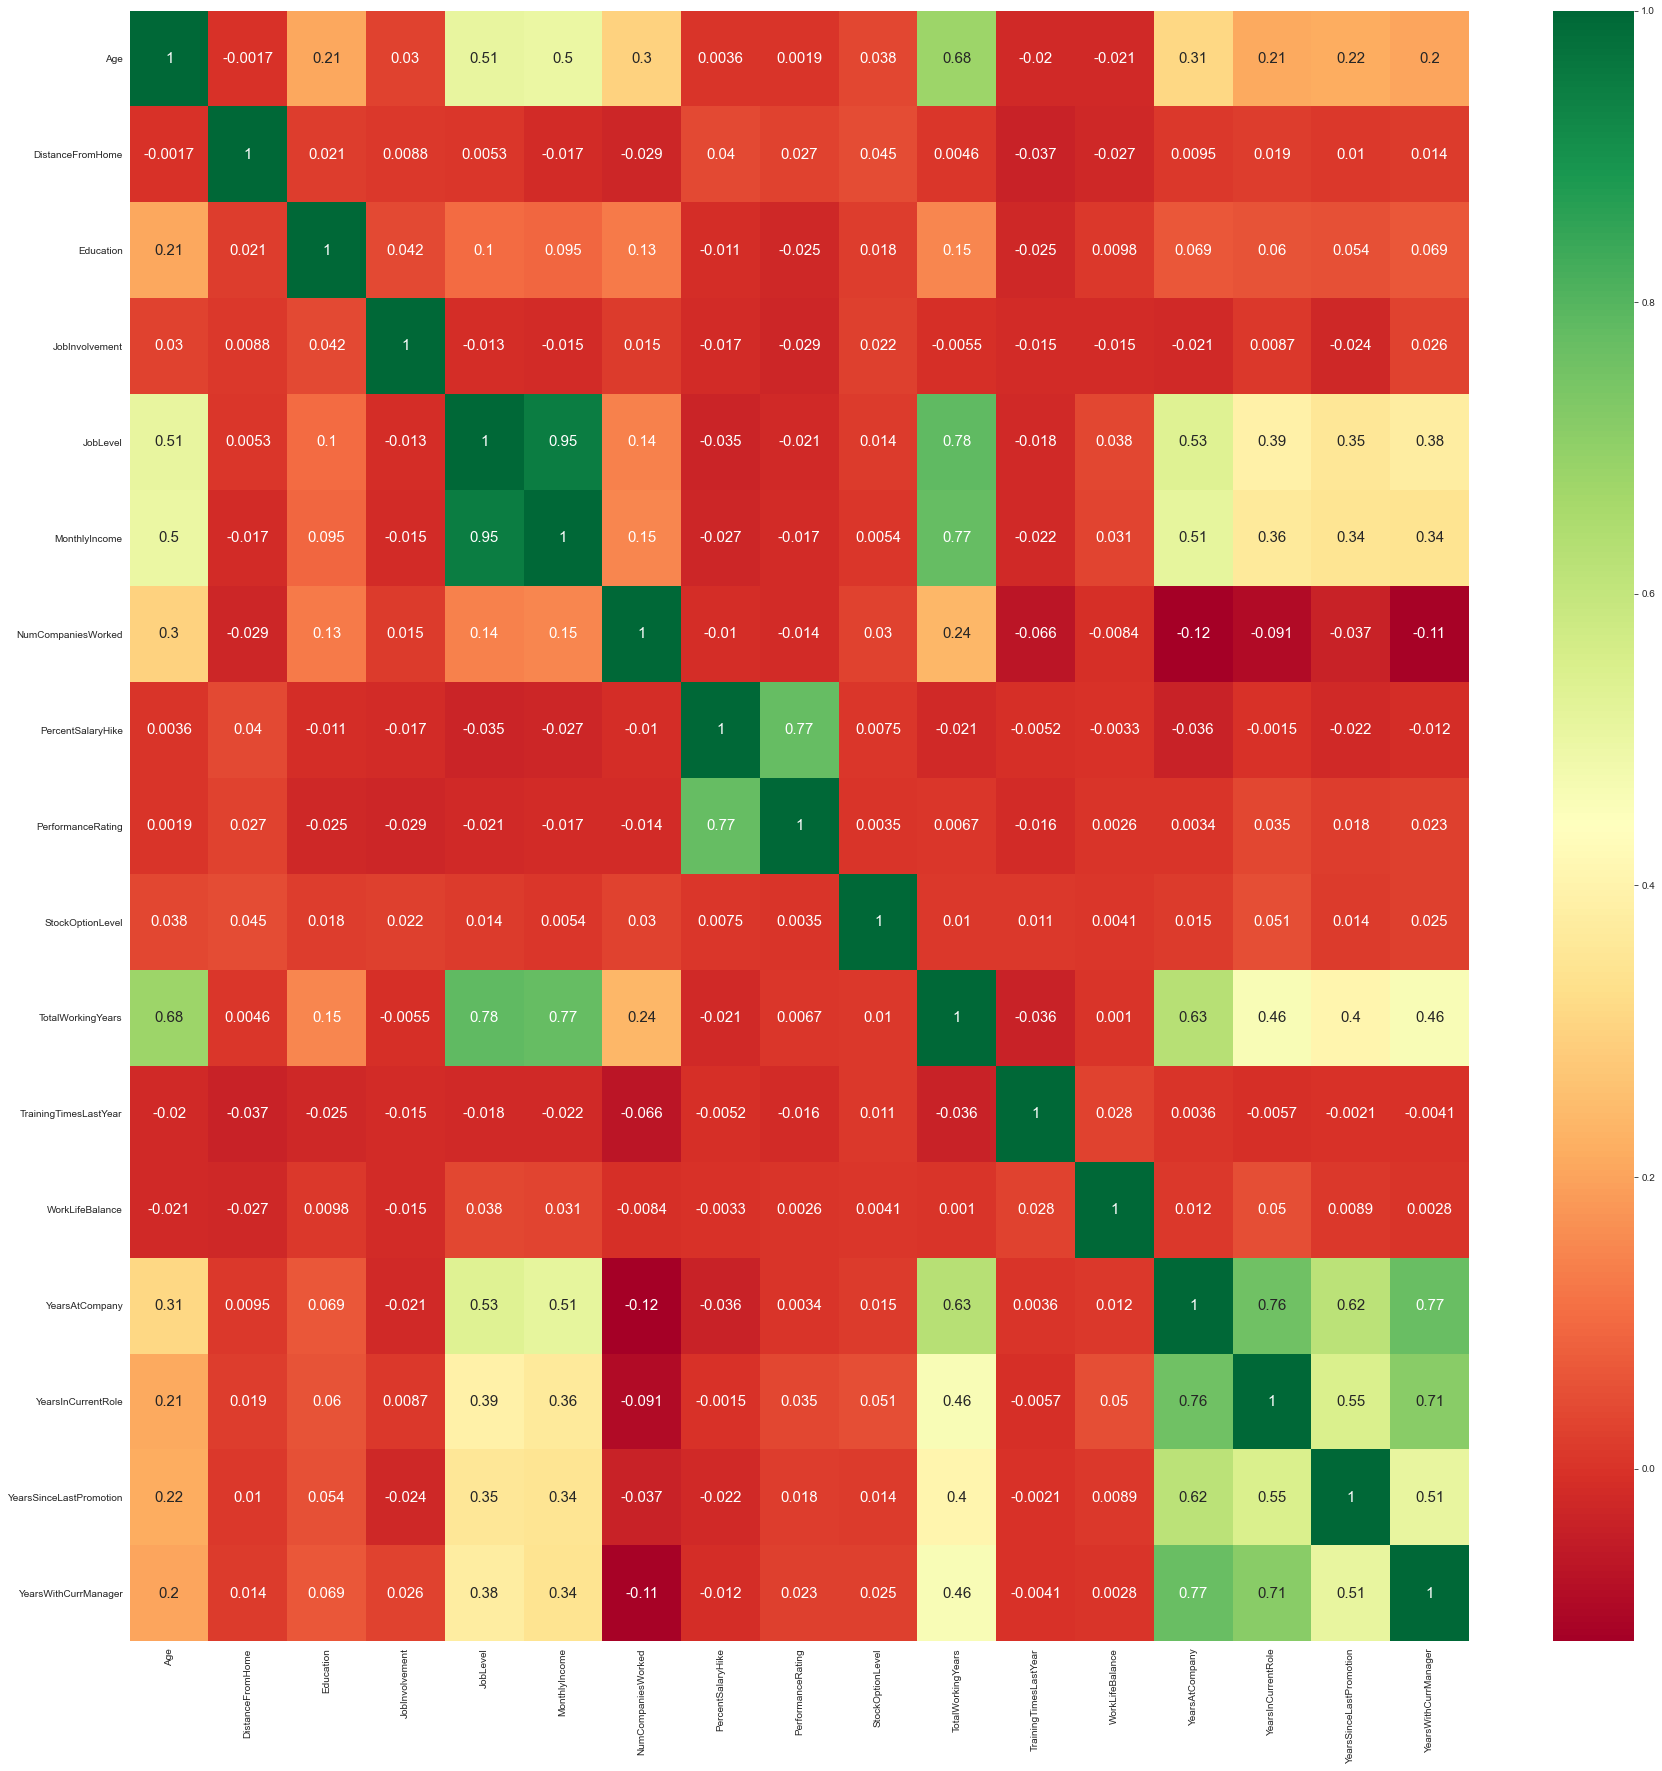

In [32]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

1. Monthly income is highly correlated with Job level and TotalWorking Year.
2. Age is also positively correlated with the Total working hours.
3. Years at comapny is highly corelated with YearInCurrentRole,YearSinceLastPromotion and YearWithCurrManager.
4. TotalWorkingYears is higlycorrletaed with JobLevel and MonthlyIncome
5. Marital status and stock option level are negatively correlated.
6. PercentSalaryHike is highly correlated with PerformanceRating.

In [33]:
df.drop(['JobLevel','TotalWorkingYears','YearsAtCompany','PerformanceRating','YearsInCurrentRole'],axis=1,inplace=True)

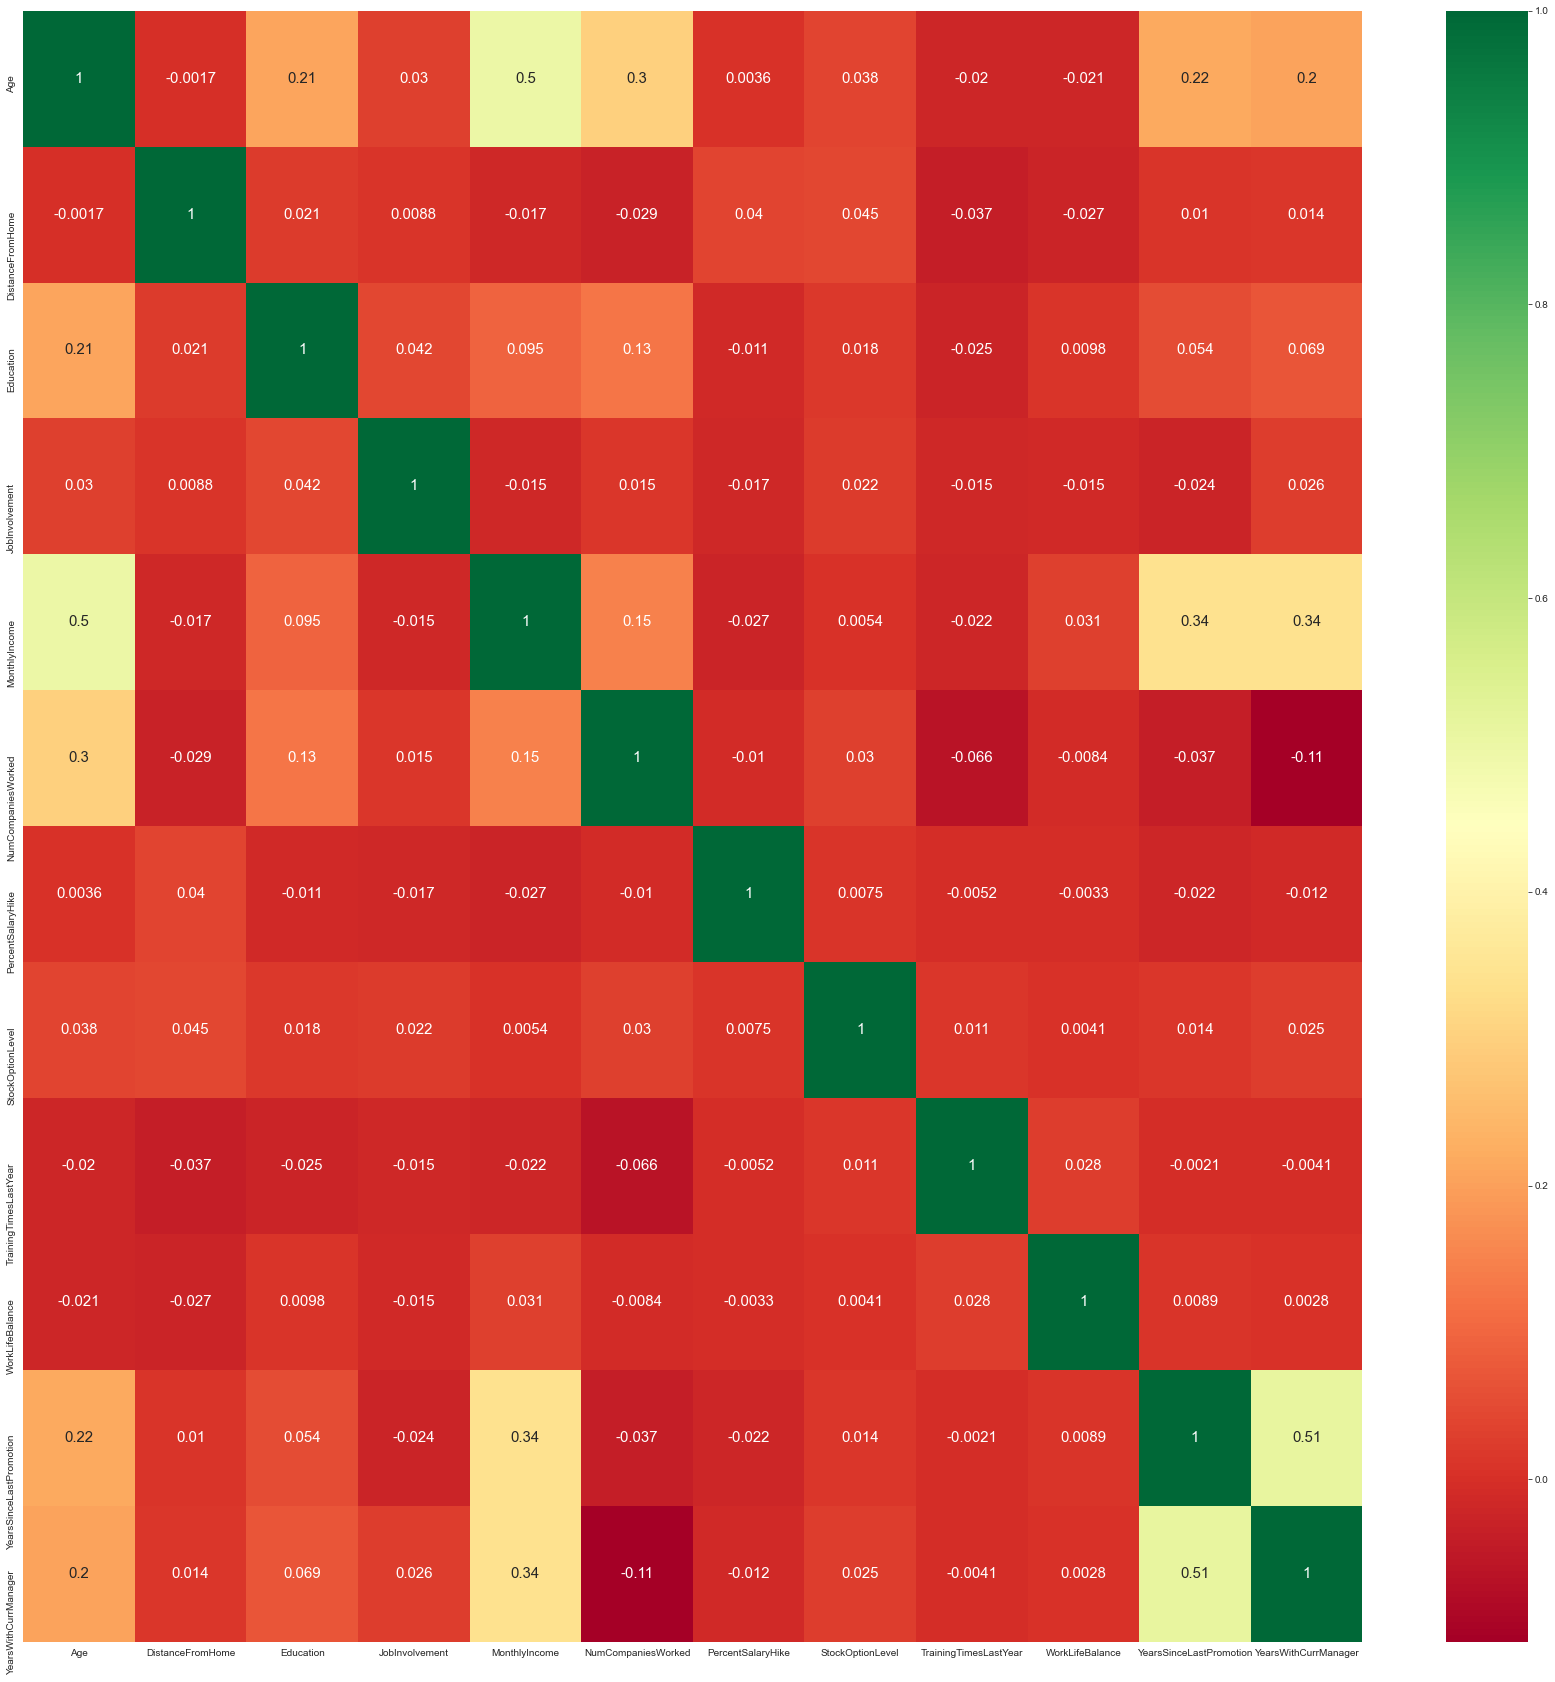

In [34]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

In [36]:
pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.24.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


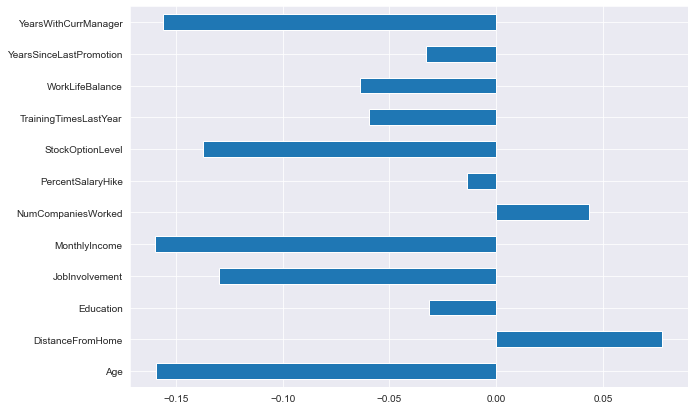

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df.drop('Attrition', axis=1).corrwith(df.Attrition).plot(kind='barh', figsize=(10, 7))
plt.show()

In [38]:
df.shape

(1470, 20)

In [39]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,Female,3,Sales Executive,Single,5993,8,Yes,11,0,0,1,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,Male,2,Research Scientist,Married,5130,1,No,23,1,3,3,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,Male,2,Laboratory Technician,Single,2090,6,Yes,15,0,3,3,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,Female,3,Research Scientist,Married,2909,1,Yes,11,0,3,3,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,Male,3,Laboratory Technician,Married,3468,9,No,12,1,3,3,2,2


## Preprocessing Data

In [40]:
df = pd.get_dummies(df,drop_first =True)
df.head()

,Age,Attrition,DistanceFromHome,Education,JobInvolvement,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1,2,3,5993,8,11,0,0,1,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,8,1,2,5130,1,23,1,3,3,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,2,2,2,2090,6,15,0,3,3,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,3,4,3,2909,1,11,0,3,3,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,2,1,3,3468,9,12,1,3,3,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [41]:
df.shape

(1470, 34)

In [42]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_col = list(df.columns)
df_col.remove('Attrition')
for col in df_col:
    df[[col]] = scaler.fit_transform(df[[col]])
df.head()

,Age,Attrition,DistanceFromHome,Education,JobInvolvement,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,1,0.000000,0.25,0.666667,0.262454,0.888889,0.000000,0.000000,0.0,0.000000,0.000000,0.294118,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.738095,0,0.250000,0.00,0.333333,0.217009,0.111111,0.857143,0.333333,0.5,0.666667,0.066667,0.411765,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,1,0.035714,0.25,0.333333,0.056925,0.666667,0.285714,0.000000,0.5,0.666667,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.357143,0,0.071429,0.75,0.666667,0.100053,0.111111,0.000000,0.000000,0.5,0.666667,0.200000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.214286,0,0.035714,0.00,0.666667,0.129489,1.000000,0.071429,0.333333,0.5,0.666667,0.133333,0.117647,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

## Spliting data

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state= 42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1176, 33), (1176,), (294, 33), (294,))

## Building baseline models
preparing LogisticRegression, RandomForest DecisionTree, and xgboost without any hyperparameter tunning.

In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [54]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('XGBoost', XGBClassifier()))

In [55]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss,precision_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [56]:
def print_score(model, X_train, y_train, X_test, y_test, train=True):
    model.fit(X_train,y_train)
    if train:
        pred_train = model.predict(X_train)
        print("Train Result:\n================================================")
        print('Accuracy Score:{}'.format(accuracy_score(y_train, pred_train) * 100))
        print('_______________________________________________')
        print(classification_report(y_train,pred_train))
        print('_______________________________________________')
        print("Classification Report:", end='')
        print('\tPrecision Score: {}'.format(precision_score(y_train, pred_train) * 100))
        print('\t\t\tRecall Score: {}'.format(recall_score(y_train, pred_train) * 100))
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred_train)}\n")
        
    elif train==False:
        pred_test = model.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred_test) * 100:.2f}%")
        print("_______________________________________________")
        print(classification_report(y_test,pred_test))
        print('_______________________________________________')
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred_test) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred_test) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred_test)}\n")

In [57]:
for name,model in models:
    print('=============={}================\n\n'.format(name))
    print(print_score(model,X_train,y_train,X_test,y_test,train=True))
    print(print_score(model,X_train,y_train,X_test,y_test,train=False))

==============Logistic Regression================


Train Result:
Accuracy Score:87.07482993197279
_______________________________________________
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       978
           1       0.76      0.34      0.47       198

    accuracy                           0.87      1176
   macro avg       0.82      0.66      0.70      1176
weighted avg       0.86      0.87      0.85      1176

_______________________________________________
Classification Report:	Precision Score: 75.55555555555556
			Recall Score: 34.34343434343434
_______________________________________________
Confusion Matrix: 
 [[956  22]
 [130  68]]

None
Test Result:
Accuracy Score: 86.05%
_______________________________________________
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.46      0.28      0.35        39

    accuracy                           0

In [59]:
acc_results = []
auc_results = []
names = []
col = ['Algorithm', 'Accuracy','ROC-AUC', 'Precision','Recall','F1_Score']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kflod = KFold(n_splits =10 )
    cv_acc = cross_val_score(model, X_train, y_train, cv= kflod, scoring = 'accuracy')
    cv_auc = cross_val_score(model, X_train,y_train, cv = kflod, scoring = 'roc_auc')
    cv_precision = cross_val_score(model, X_train,y_train, cv = kflod, scoring = 'precision')
    cv_recall = cross_val_score(model, X_train,y_train, cv = kflod, scoring = 'recall')
    f1_score = cross_val_score(model, X_train,y_train, cv = kflod, scoring = 'f1')
    
    acc_results.append(cv_acc)
    auc_results.append(cv_auc)

    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_acc.mean()*100, 2),
                         round(cv_auc.mean()*100, 2),
                         round(cv_precision.mean()*100, 2),
                         round(cv_recall.mean()*100, 2),
                         round(f1_score.mean()*100,2)
                         ]
    i += 1
df_results.sort_values(by=['ROC-AUC'], ascending=False)

[11:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[11:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:56:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Algorithm,Accuracy,ROC-AUC,Precision,Recall,F1_Score
0,Logistic Regression,85.97,83.04,68.00,31.62,41.62
1,Random Forest,85.89,80.78,79.64,20.07,31.61
2,SVM,85.04,79.24,83.83,15.65,24.48
4,XGBoost,84.95,79.13,58.97,37.83,44.07
3,Decision Tree Classifier,79.58,62.08,37.45,37.47,37.68


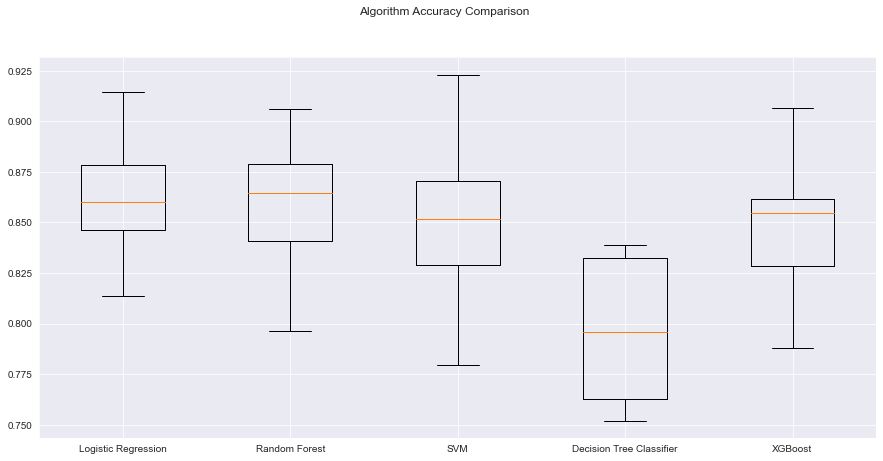

In [60]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

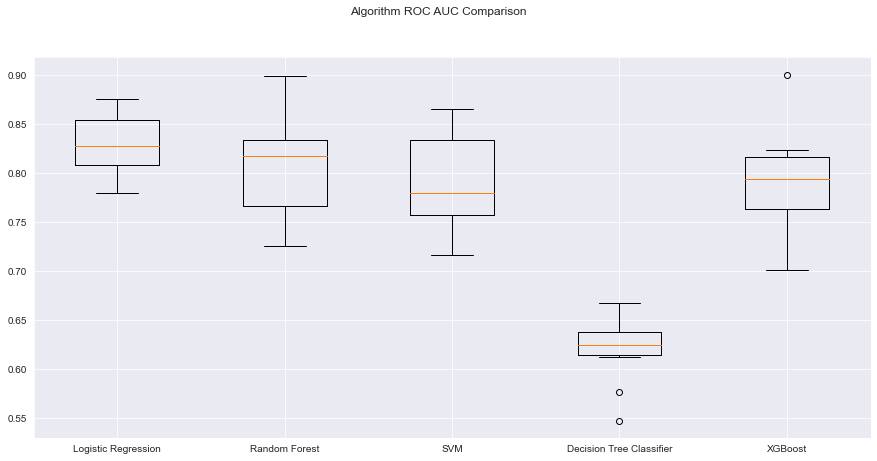

In [61]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Based on our ROC AUC comparison analysis, Logistic Regression and Random Forest show the highest mean AUC scores. I will shortlist these two algorithms for further analysis

## Logistic Regression

In [63]:
kfold = KFold(n_splits=10)
lr_cv = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(lr_cv, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score : %.2f" % (round(results.mean()*100,2)))

AUC score : 83.04


### Fine-tuning

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=1.2609999999999997)
best params: {'C': 1.2609999999999997}
best score: 0.8318868138682494


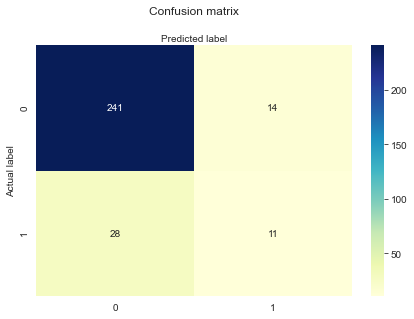

In [69]:
cnf_matrix = confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [70]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 85.71


In [71]:
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.44      0.28      0.34        39

    accuracy                           0.86       294
   macro avg       0.67      0.61      0.63       294
weighted avg       0.84      0.86      0.84       294



In [72]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.729


## Random Forest

In [73]:
rf = RandomForestClassifier(max_depth =15, 
                                       min_samples_leaf =1,
                                       min_samples_split = 8, 
                                       n_estimators = 75)


rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=8, n_estimators=75)

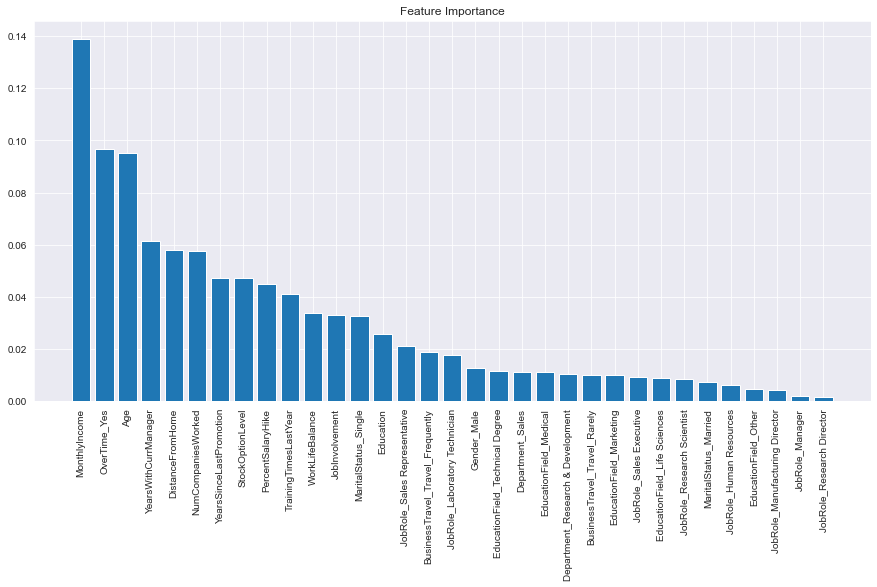

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\surya\\anaconda3\\envs\\emp\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



In [74]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [75]:
importances = rf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(33):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.139035
1,OverTime_Yes,0.096641
2,Age,0.095308
3,YearsWithCurrManager,0.061362
4,DistanceFromHome,0.057853
5,NumCompaniesWorked,0.057601
6,YearsSinceLastPromotion,0.047160
7,StockOptionLevel,0.047151
8,PercentSalaryHike,0.044737
9,TrainingTimesLastYear,0.040984


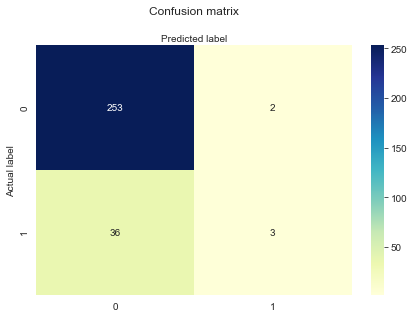

In [76]:
## Confusion Matrix
cnf_matrix = confusion_matrix(y_test, rf.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [77]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 87.07


In [78]:
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294



In [79]:
rf.fit(X_train, y_train) # fit optimised model to the training data
probs = rf.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.729


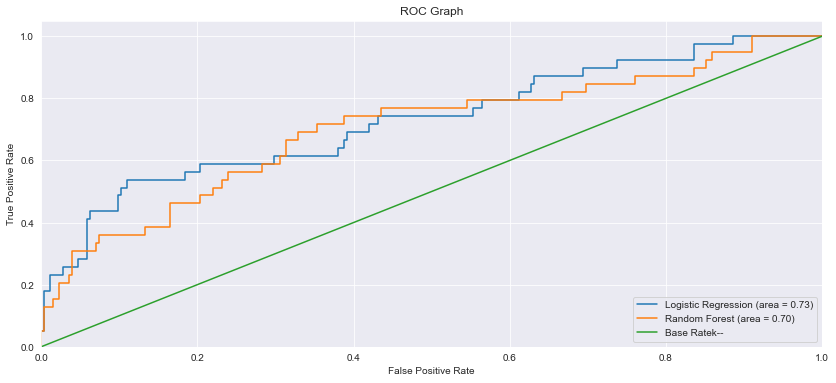

In [80]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()


As shown Above, the fine-tuned Logistic Regression model showed a higher AUC score compared to the Random Forest Classifier.

## Balancing data

In [88]:
pip install imblearn


In [87]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train) 

## Logistic Regression

In [89]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.75      0.82       255
           1       0.26      0.59      0.36        39

    accuracy                           0.72       294
   macro avg       0.59      0.67      0.59       294
weighted avg       0.83      0.72      0.76       294



## Fine Tuning


In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train_res, y_train_res)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=1.9809999999999997)
best params: {'C': 1.9809999999999997}
best score: 0.8686885189590248


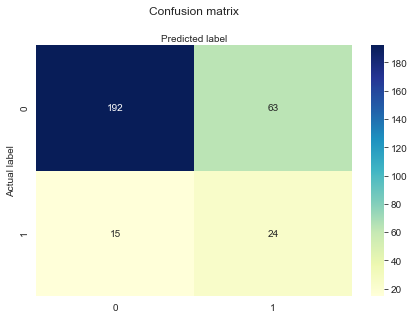

In [92]:
cnf_matrix = confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [93]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 73.47


In [94]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train_res, y_train_res)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       255
           1       0.28      0.62      0.38        39

    accuracy                           0.73       294
   macro avg       0.60      0.68      0.61       294
weighted avg       0.84      0.73      0.77       294



In [95]:
log_opt.fit(X_train_res, y_train_res) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.727


## Random Forest

In [96]:
rf = RandomForestClassifier(max_depth =15, 
                                       min_samples_leaf =1,
                                       min_samples_split = 8, 
                                       n_estimators = 75)


rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=15, min_samples_split=8, n_estimators=75)

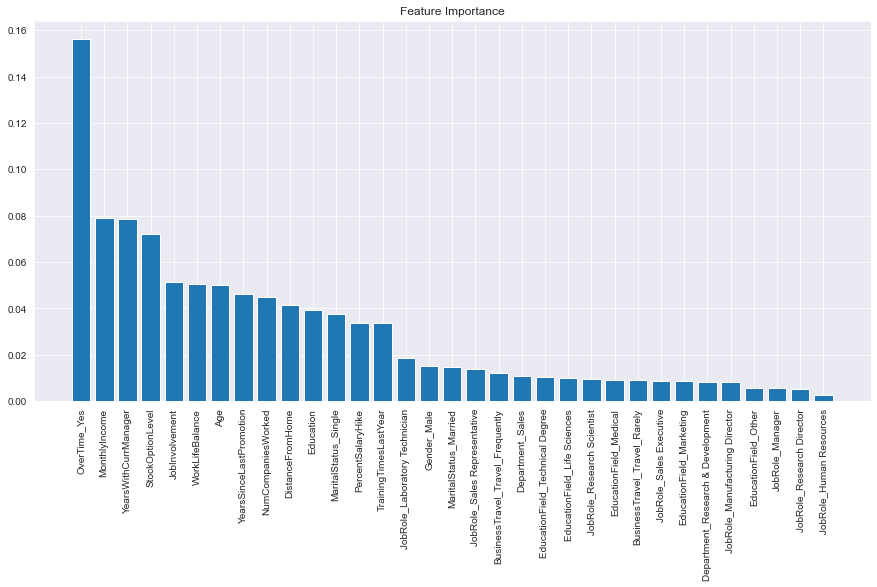

In [97]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train_res.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train_res.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train_res.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [98]:
importances = rf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(33):
    feat = X_train_res.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,OverTime_Yes,0.156336
1,MonthlyIncome,0.079042
2,YearsWithCurrManager,0.078632
3,StockOptionLevel,0.072062
4,JobInvolvement,0.051543
5,WorkLifeBalance,0.050408
6,Age,0.049918
7,YearsSinceLastPromotion,0.046211
8,NumCompaniesWorked,0.044744
9,DistanceFromHome,0.041338


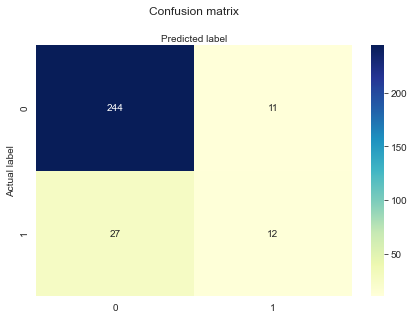

In [99]:
cnf_matrix = confusion_matrix(y_test, rf.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [100]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 87.07


In [101]:
rf.fit(X_train_res, y_train_res)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       255
           1       0.50      0.26      0.34        39

    accuracy                           0.87       294
   macro avg       0.70      0.61      0.63       294
weighted avg       0.84      0.87      0.85       294



In [102]:
rf.fit(X_train_res, y_train_res) # fit optimised model to the training data
probs = rf.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.727


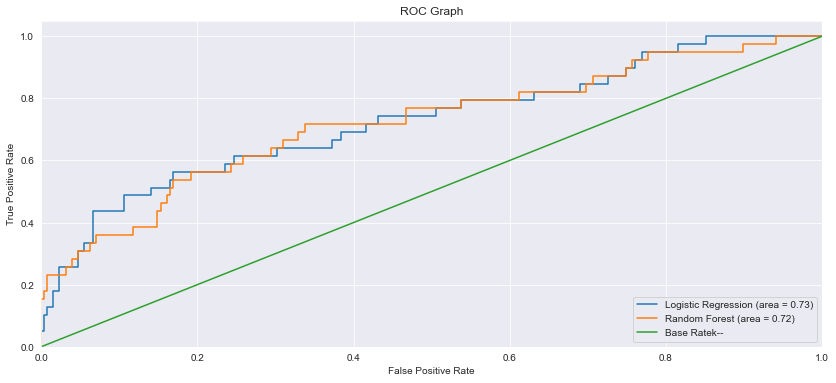

In [103]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [104]:
file = open('model.pkl','wb')
pickle.dump(log_gs,file)
